# Data Exploration - Financial Stress Test Dataset

This notebook explores the merged dataset containing:
- FRED macroeconomic indicators
- Market data (VIX, S&P 500)
- 25 companies' stock data

**Dataset:** `financial_data_complete_daily.csv`

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


## 1. Load Data

In [3]:
# Load main dataset
df = pd.read_csv('/Users/priyanka/Desktop/MLOPs/Mlops_Project_FinancialCrises/data/processed/merged/financial_data_complete_daily.csv',
                 index_col=0, parse_dates=True)

# Load feature list
feature_list = pd.read_csv('/Users/priyanka/Desktop/MLOPs/Mlops_Project_FinancialCrises/data/processed/merged/feature_list.csv')

print(f"✅ Dataset loaded")
print(f"   Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"   Date range: {df.index.min()} to {df.index.max()}")
print(f"\n📊 Feature Breakdown:")
print(feature_list['Type'].value_counts())

✅ Dataset loaded
   Shape: 6,910 rows × 96 columns
   Date range: 2000-01-01 00:00:00 to 2025-10-24 00:00:00

📊 Feature Breakdown:
Type
Company    75
FRED       13
Time        5
Market      3
Name: count, dtype: int64


## 2. Basic Data Inspection

In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,GDP_Growth,CPI_Inflation,Unemployment_Rate,Federal_Funds_Rate,Yield_Curve_Spread,Consumer_Confidence,Oil_Price,Trade_Balance,Corporate_Bond_Spread,TED_Spread,...,TSLA_Stock_Volume,UNH_Stock_Volume,WFC_Stock_Volume,WMT_Stock_Volume,XOM_Stock_Volume,Year,Month,Quarter,DayOfWeek,IsMonthEnd
2000-01-01,0.0,0.0,4.0,5.45,1.10,112.0,25.56,-27131.0,1.69,0.77,...,281494500.0,3431200.0,9037000.0,25109700.0,13458200.0,2000,1,1,5,False
2000-01-03,0.0,0.0,4.0,5.45,1.10,112.0,25.56,-27131.0,1.69,0.77,...,281494500.0,3431200.0,9037000.0,25109700.0,13458200.0,2000,1,1,0,False
2000-01-04,0.0,0.0,4.0,5.45,1.06,112.0,25.56,-27131.0,1.72,0.77,...,281494500.0,5997600.0,15237200.0,20235300.0,14510800.0,2000,1,1,1,False
2000-01-05,0.0,0.0,4.0,5.45,1.18,112.0,24.65,-27131.0,1.67,0.75,...,281494500.0,10562400.0,8228200.0,21056100.0,17485000.0,2000,1,1,2,False
2000-01-06,0.0,0.0,4.0,5.45,1.16,112.0,24.79,-27131.0,1.67,0.78,...,281494500.0,15300000.0,8326800.0,19633500.0,19461600.0,2000,1,1,3,False


In [5]:
# Data info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6910 entries, 2000-01-01 to 2025-10-24
Data columns (total 96 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GDP_Growth              6910 non-null   float64
 1   CPI_Inflation           6910 non-null   float64
 2   Unemployment_Rate       6910 non-null   float64
 3   Federal_Funds_Rate      6910 non-null   float64
 4   Yield_Curve_Spread      6910 non-null   float64
 5   Consumer_Confidence     6910 non-null   float64
 6   Oil_Price               6910 non-null   float64
 7   Trade_Balance           6910 non-null   float64
 8   Corporate_Bond_Spread   6910 non-null   float64
 9   TED_Spread              6910 non-null   float64
 10  Treasury_10Y_Yield      6910 non-null   float64
 11  Financial_Stress_Index  6910 non-null   float64
 12  High_Yield_Spread       6910 non-null   float64
 13  VIX                     6910 non-null   float64
 14  S

In [6]:
# Check for missing values
missing_total = df.isna().sum().sum()
missing_pct = (missing_total / (df.shape[0] * df.shape[1])) * 100

print(f"Missing values: {missing_total:,} ({missing_pct:.2f}% of total)")

if missing_total > 0:
    print("\nColumns with missing values:")
    missing_by_col = df.isna().sum()
    print(missing_by_col[missing_by_col > 0].sort_values(ascending=False))
else:
    print("✅ No missing values!")

Missing values: 0 (0.00% of total)
✅ No missing values!


## 3. Summary Statistics

In [7]:
# Get FRED and Market columns
fred_cols = feature_list[feature_list['Type'] == 'FRED']['Feature'].tolist()
market_cols = feature_list[feature_list['Type'] == 'Market']['Feature'].tolist()

# Summary statistics for macro indicators
print("📈 Summary Statistics - Macroeconomic Indicators:")
df[fred_cols].describe().round(2)

📈 Summary Statistics - Macroeconomic Indicators:


,GDP_Growth,CPI_Inflation,Unemployment_Rate,Federal_Funds_Rate,Yield_Curve_Spread,Consumer_Confidence,Oil_Price,Trade_Balance,Corporate_Bond_Spread,TED_Spread,Treasury_10Y_Yield,Financial_Stress_Index,High_Yield_Spread
count,6910.00,6910.00,6910.00,6910.00,6910.00,6910.00,6910.00,6910.00,6910.00,6910.00,6910.00,6910.00,6910.00
mean,0.01,0.04,5.65,1.99,1.39,82.12,63.76,-50514.35,2.48,0.36,3.32,0.02,5.38
std,0.17,0.15,1.94,2.03,1.35,13.71,25.06,16167.57,0.74,0.38,1.30,1.10,2.62
min,-7.88,-1.77,3.40,0.05,-1.89,50.00,-36.98,-136419.00,1.36,0.06,0.52,-1.13,2.41
25%,0.00,0.00,4.20,0.15,0.27,71.70,44.62,-61126.00,1.91,0.16,2.23,-0.62,3.65
50%,0.00,0.00,5.00,1.26,1.54,83.40,63.22,-45332.00,2.35,0.24,3.40,-0.24,4.60
75%,0.00,0.00,6.30,4.00,2.47,93.00,81.57,-39892.00,2.88,0.41,4.30,0.32,6.41
max,7.76,1.38,14.80,6.54,3.85,112.00,145.31,-25839.00,6.16,4.58,6.79,9.61,21.82


In [8]:
# Summary statistics for market indicators
print("📊 Summary Statistics - Market Indicators:")
df[market_cols].describe().round(2)

📊 Summary Statistics - Market Indicators:


,VIX,SP500,SP500_Return
count,6910.00,6910.00,6910.00
mean,19.83,2236.88,0.03
std,8.37,1408.59,1.21
min,9.14,676.53,-11.98
25%,13.96,1208.49,-0.47
50%,17.79,1518.15,0.06
75%,23.25,2869.88,0.58
max,82.69,6791.69,11.58


## 4. Visualize Key Macroeconomic Indicators

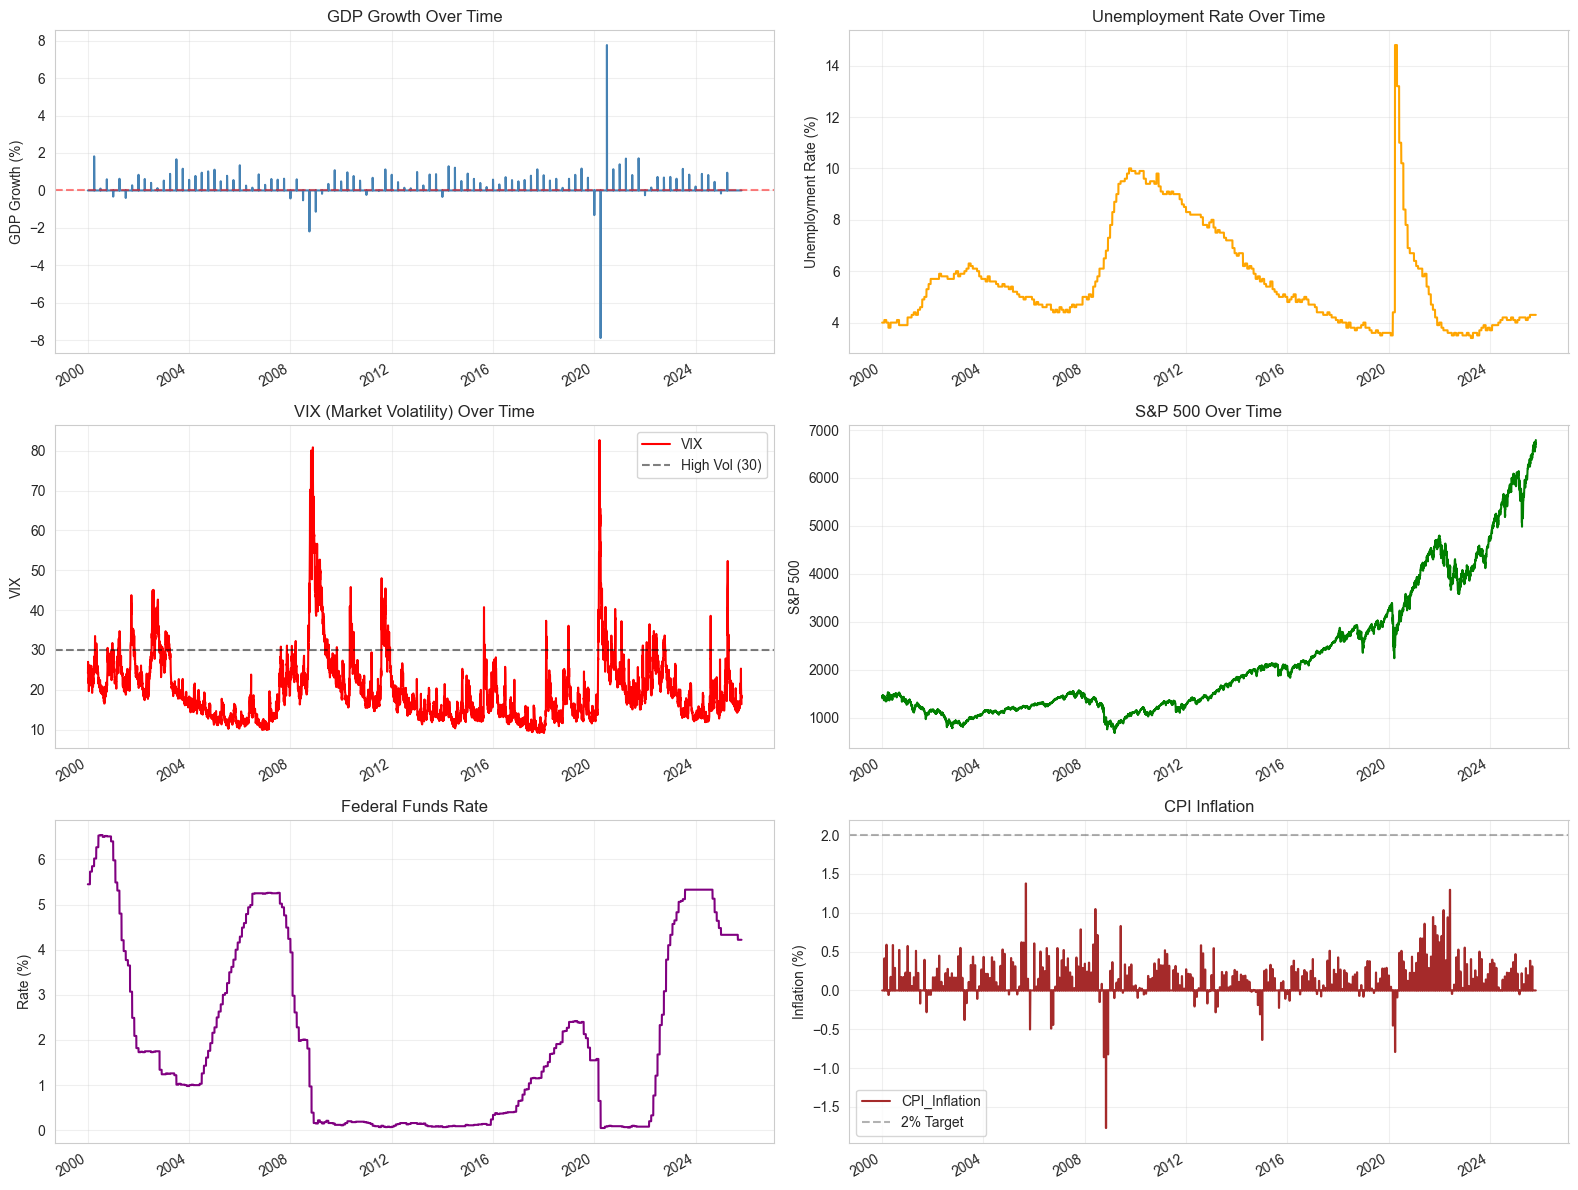

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# 1. GDP Growth
if 'GDP_Growth' in df.columns:
    df['GDP_Growth'].plot(ax=axes[0, 0], title='GDP Growth Over Time', color='steelblue')
    axes[0, 0].set_ylabel('GDP Growth (%)')
    axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    axes[0, 0].grid(True, alpha=0.3)

# 2. Unemployment Rate
if 'Unemployment_Rate' in df.columns:
    df['Unemployment_Rate'].plot(ax=axes[0, 1], title='Unemployment Rate Over Time', color='orange')
    axes[0, 1].set_ylabel('Unemployment Rate (%)')
    axes[0, 1].grid(True, alpha=0.3)

# 3. VIX (Volatility Index)
if 'VIX' in df.columns:
    df['VIX'].plot(ax=axes[1, 0], title='VIX (Market Volatility) Over Time', color='red')
    axes[1, 0].set_ylabel('VIX')
    axes[1, 0].axhline(y=30, color='k', linestyle='--', alpha=0.5, label='High Vol (30)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# 4. S&P 500
if 'SP500' in df.columns:
    df['SP500'].plot(ax=axes[1, 1], title='S&P 500 Over Time', color='green')
    axes[1, 1].set_ylabel('S&P 500')
    axes[1, 1].grid(True, alpha=0.3)

# 5. Federal Funds Rate
if 'Federal_Funds_Rate' in df.columns:
    df['Federal_Funds_Rate'].plot(ax=axes[2, 0], title='Federal Funds Rate', color='purple')
    axes[2, 0].set_ylabel('Rate (%)')
    axes[2, 0].grid(True, alpha=0.3)

# 6. CPI Inflation
if 'CPI_Inflation' in df.columns:
    df['CPI_Inflation'].plot(ax=axes[2, 1], title='CPI Inflation', color='brown')
    axes[2, 1].set_ylabel('Inflation (%)')
    axes[2, 1].axhline(y=2, color='k', linestyle='--', alpha=0.3, label='2% Target')
    axes[2, 1].legend()
    axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/priyanka/Desktop/MLOPs/Mlops_Project_FinancialCrises/reports/financial_indicators_over_time.png', dpi=300)
plt.show()

## 5. Analyze Company Data

In [12]:
# Get all company tickers
company_cols = feature_list[feature_list['Type'] == 'Company']['Feature'].tolist()

# Extract unique company tickers
companies = sorted(list(set([col.split('_')[0] for col in company_cols])))

print(f"Total companies: {len(companies)}")
print(f"Companies: {', '.join(companies)}")

# Calculate average returns for each company
returns_data = []
for company in companies:
    return_col = f"{company}_Stock_Return"
    if return_col in df.columns:
        avg_return = df[return_col].mean()
        volatility = df[return_col].std()
        returns_data.append({
            'Company': company,
            'Avg_Return': avg_return,
            'Volatility': volatility,
            'Sharpe_Ratio': avg_return / volatility if volatility > 0 else 0
        })

returns_df = pd.DataFrame(returns_data).sort_values('Avg_Return', ascending=False)

print(f"\n💰 Top 10 Companies by Average Return:")
print(returns_df.head(10).to_string(index=False))

print(f"\n📉 Bottom 5 Companies by Average Return:")
print(returns_df.tail(5).to_string(index=False))

Total companies: 25
Companies: AAPL, AMZN, BA, BAC, C, CAT, COST, CVX, DIS, GOOGL, GS, HD, JNJ, JPM, LIN, MCD, MSFT, NFLX, NVDA, PG, TSLA, UNH, WFC, WMT, XOM

💰 Top 10 Companies by Average Return:
Company  Avg_Return  Volatility  Sharpe_Ratio
  GOOGL    1.513929    3.470409      0.436239
   NFLX    0.270667    3.258323      0.083070
   NVDA    0.182190    3.723523      0.048930
   AMZN    0.106854    3.083063      0.034658
   AAPL    0.095589    2.565011      0.037266
    CAT    0.075389    1.998364      0.037726
    UNH    0.075195    1.992768      0.037734
    LIN    0.072439    1.656278      0.043736
   COST    0.068462    1.689128      0.040531
    JPM    0.064430    2.317728      0.027799

📉 Bottom 5 Companies by Average Return:
Company  Avg_Return  Volatility  Sharpe_Ratio
    WMT    0.034658    1.463227      0.023686
     PG    0.030707    1.300938      0.023604
    JNJ    0.028572    1.199883      0.023812
   TSLA    0.017010    2.801356      0.006072
      C    0.012484    2.9

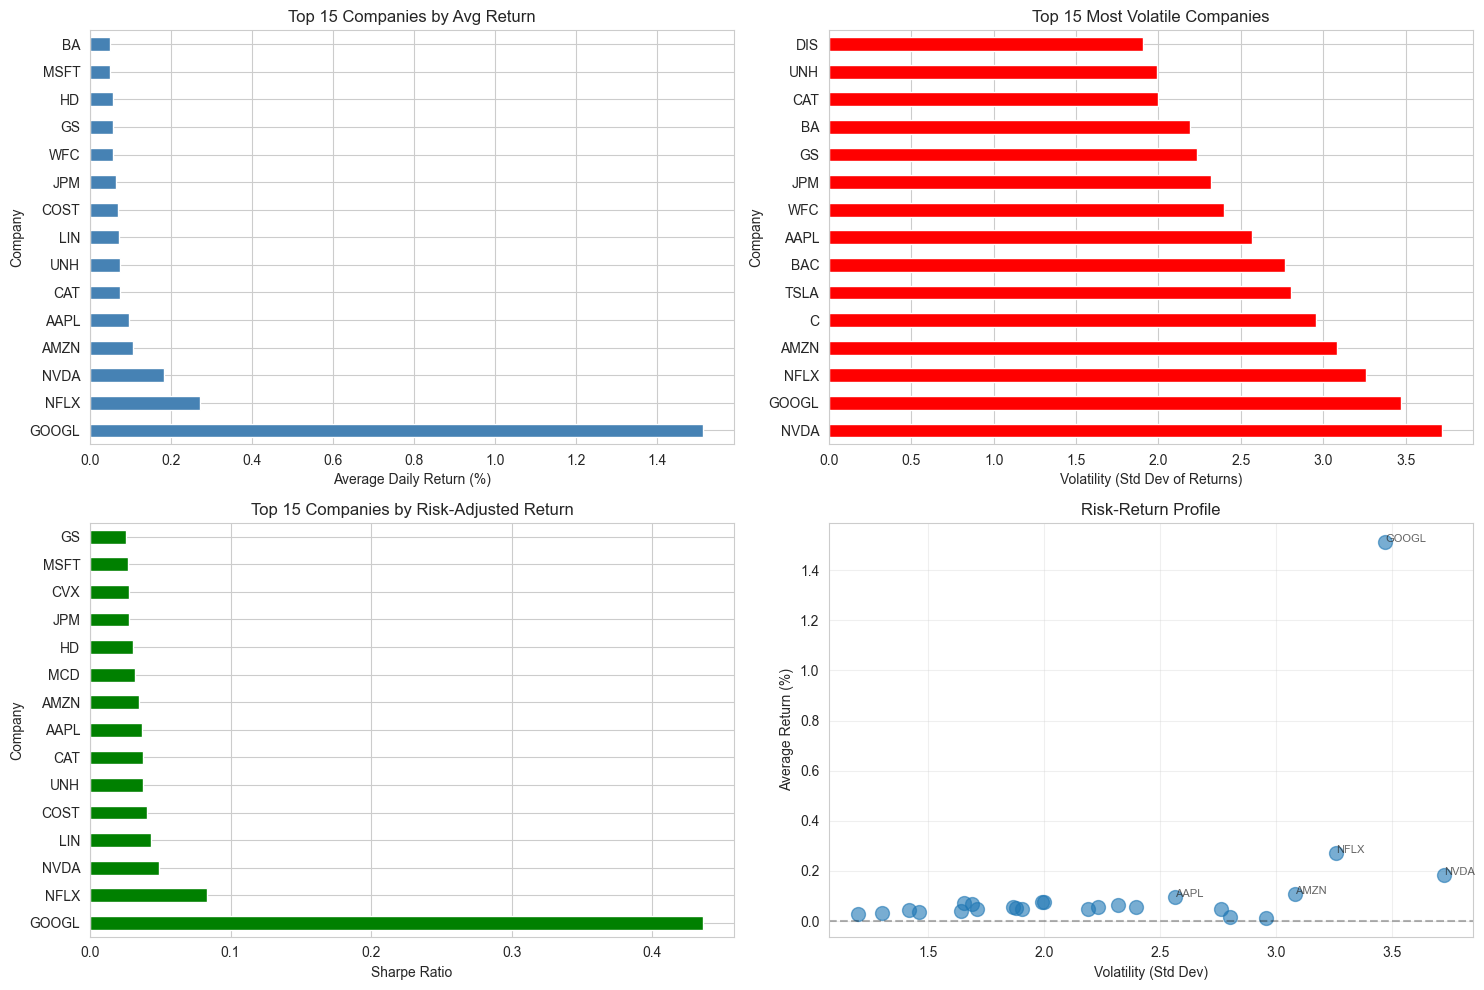

In [13]:
# Visualize company performance
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Average returns
returns_df.head(15).plot(x='Company', y='Avg_Return', kind='barh', 
                         ax=axes[0, 0], title='Top 15 Companies by Avg Return',
                         color='steelblue', legend=False)
axes[0, 0].set_xlabel('Average Daily Return (%)')

# 2. Volatility
returns_df.sort_values('Volatility', ascending=False).head(15).plot(
    x='Company', y='Volatility', kind='barh',
    ax=axes[0, 1], title='Top 15 Most Volatile Companies',
    color='red', legend=False
)
axes[0, 1].set_xlabel('Volatility (Std Dev of Returns)')

# 3. Sharpe Ratio
returns_df.sort_values('Sharpe_Ratio', ascending=False).head(15).plot(
    x='Company', y='Sharpe_Ratio', kind='barh',
    ax=axes[1, 0], title='Top 15 Companies by Risk-Adjusted Return',
    color='green', legend=False
)
axes[1, 0].set_xlabel('Sharpe Ratio')

# 4. Return vs Volatility scatter
axes[1, 1].scatter(returns_df['Volatility'], returns_df['Avg_Return'], 
                   alpha=0.6, s=100)
axes[1, 1].set_xlabel('Volatility (Std Dev)')
axes[1, 1].set_ylabel('Average Return (%)')
axes[1, 1].set_title('Risk-Return Profile')
axes[1, 1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1, 1].grid(True, alpha=0.3)

# Annotate top 5 companies
for _, row in returns_df.head(5).iterrows():
    axes[1, 1].annotate(row['Company'], 
                       (row['Volatility'], row['Avg_Return']),
                       fontsize=8, alpha=0.7)

plt.tight_layout()
plt.savefig('/Users/priyanka/Desktop/MLOPs/Mlops_Project_FinancialCrises/reports/company_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Correlation Analysis

In [14]:
# Correlation with VIX (stress indicator)
if 'VIX' in df.columns:
    print("🔗 Top 20 Correlations with VIX (Market Stress):")
    vix_corr = df.corr()['VIX'].sort_values(ascending=False)
    print(vix_corr.head(20).round(3))
    
    print("\n📉 Most Negatively Correlated with VIX:")
    print(vix_corr.tail(10).round(3))

🔗 Top 20 Correlations with VIX (Market Stress):
VIX                       1.000
Financial_Stress_Index    0.813
High_Yield_Spread         0.770
Corporate_Bond_Spread     0.683
XOM_Stock_Volume          0.555
JPM_Stock_Volume          0.503
WFC_Stock_Volume          0.481
GS_Stock_Volume           0.480
CVX_Stock_Volume          0.470
TED_Spread                0.425
HD_Stock_Volume           0.406
WMT_Stock_Volume          0.359
COST_Stock_Volume         0.350
CAT_Stock_Volume          0.346
MSFT_Stock_Volume         0.346
JNJ_Stock_Volume          0.339
DIS_Stock_Volume          0.337
BA_Stock_Volume           0.330
LIN_Stock_Volume          0.317
PG_Stock_Volume           0.312
Name: VIX, dtype: float64

📉 Most Negatively Correlated with VIX:
SP500                 -0.165
GS_Stock_Price        -0.172
Oil_Price             -0.173
CVX_Stock_Price       -0.191
DIS_Stock_Price       -0.204
XOM_Stock_Price       -0.228
BAC_Stock_Price       -0.230
BA_Stock_Price        -0.262
WFC_Stock_Pric

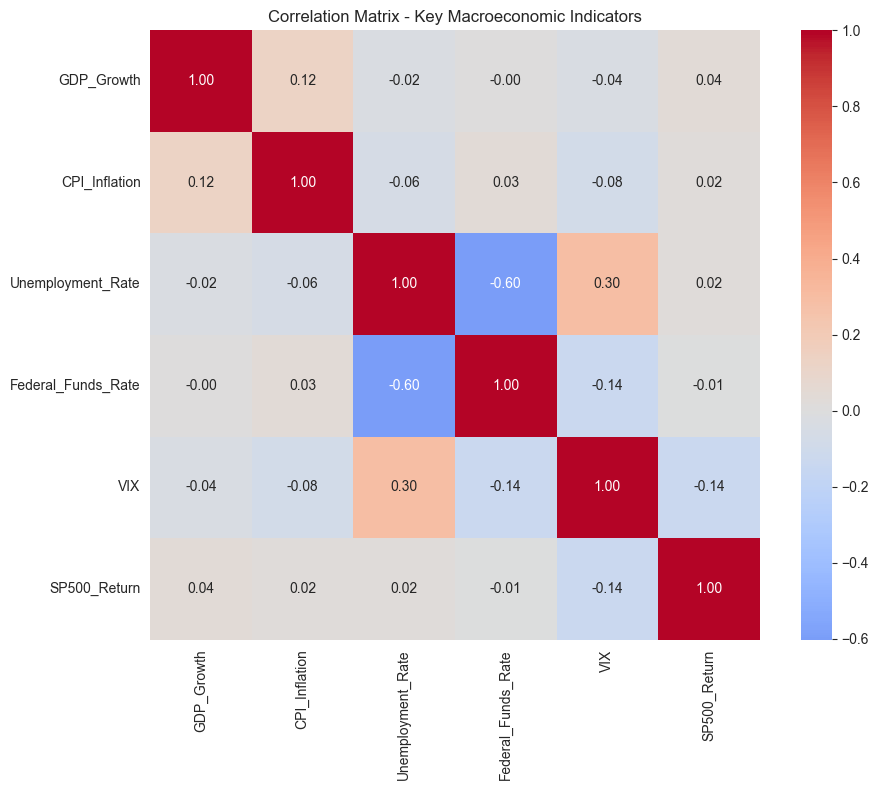

<Figure size 1400x600 with 0 Axes>

In [16]:
# Correlation heatmap for macro indicators
macro_indicators = ['GDP_Growth', 'CPI_Inflation', 'Unemployment_Rate', 
                   'Federal_Funds_Rate', 'VIX', 'SP500_Return']
available_macro = [col for col in macro_indicators if col in df.columns]

if len(available_macro) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[available_macro].corr(), annot=True, cmap='coolwarm', 
                center=0, fmt='.2f', square=True)
    plt.title('Correlation Matrix - Key Macroeconomic Indicators')
    plt.tight_layout()
    plt.show()
    plt.savefig('/Users/priyanka/Desktop/MLOPs/Mlops_Project_FinancialCrises/reports/macro_correlation_heatmap.png', dpi=300)
  

## 7. Identify Historical Stress Periods

In [17]:
# Define stress as VIX > 30
if 'VIX' in df.columns:
    df['High_Volatility'] = df['VIX'] > 30
    stress_periods = df[df['High_Volatility']]
    
    print(f"🚨 High Volatility Periods (VIX > 30):")
    print(f"   Total days: {len(stress_periods):,}")
    print(f"   Percentage: {len(stress_periods)/len(df)*100:.1f}%")
    
    if len(stress_periods) > 0:
        print(f"\n   First occurrence: {stress_periods.index[0]}")
        print(f"   Last occurrence: {stress_periods.index[-1]}")
        
        # Compare indicators during stress vs normal
        print("\n📊 Average Indicators - Stress vs Normal:")
        comparison_cols = ['GDP_Growth', 'Unemployment_Rate', 'VIX', 'SP500_Return']
        available_comp = [col for col in comparison_cols if col in df.columns]
        
        stress_avg = stress_periods[available_comp].mean()
        normal_avg = df[~df['High_Volatility']][available_comp].mean()
        
        comparison = pd.DataFrame({
            'High_Volatility': stress_avg,
            'Normal': normal_avg,
            'Difference': stress_avg - normal_avg
        })
        print(comparison.round(2))

🚨 High Volatility Periods (VIX > 30):
   Total days: 662
   Percentage: 9.6%

   First occurrence: 2000-04-14 00:00:00
   Last occurrence: 2025-04-22 00:00:00

📊 Average Indicators - Stress vs Normal:
                   High_Volatility  Normal  Difference
GDP_Growth                   -0.01    0.01       -0.02
Unemployment_Rate             7.14    5.49        1.65
VIX                          38.80   17.82       20.98
SP500_Return                 -0.33    0.07       -0.40


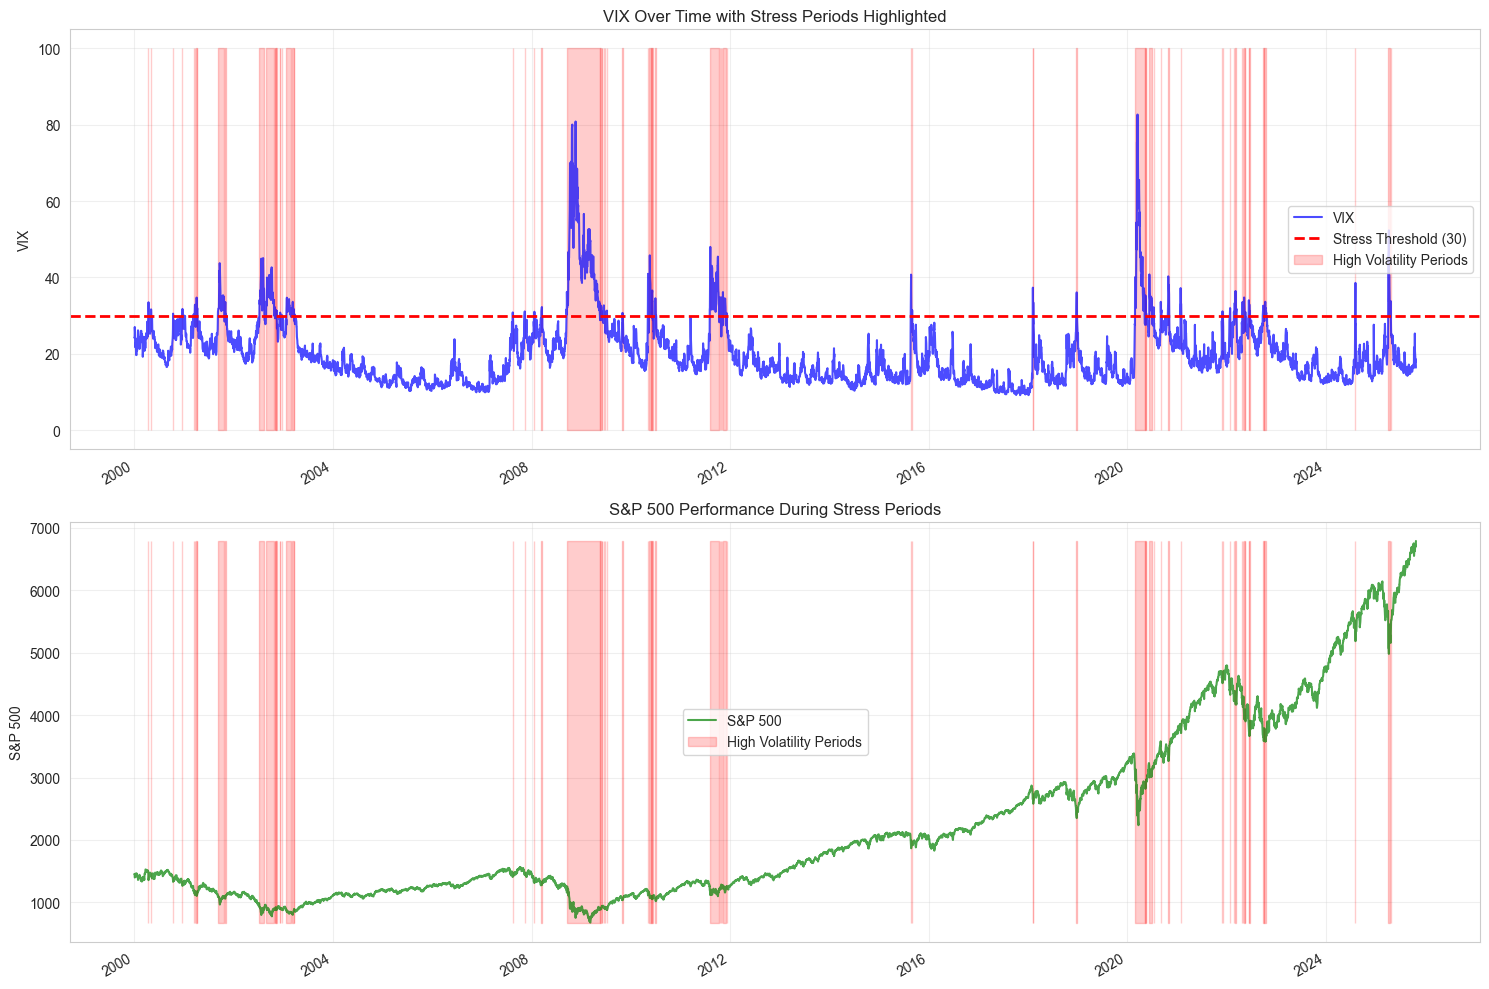

<Figure size 1400x600 with 0 Axes>

In [18]:
# Visualize stress periods
if 'VIX' in df.columns:
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot 1: VIX with stress threshold
    df['VIX'].plot(ax=axes[0], color='blue', alpha=0.7, label='VIX')
    axes[0].axhline(y=30, color='r', linestyle='--', linewidth=2, label='Stress Threshold (30)')
    axes[0].fill_between(df.index, 0, 100, where=df['High_Volatility'], 
                         alpha=0.2, color='red', label='High Volatility Periods')
    axes[0].set_ylabel('VIX')
    axes[0].set_title('VIX Over Time with Stress Periods Highlighted')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: S&P 500 with stress periods
    if 'SP500' in df.columns:
        df['SP500'].plot(ax=axes[1], color='green', alpha=0.7, label='S&P 500')
        axes[1].fill_between(df.index, df['SP500'].min(), df['SP500'].max(), 
                             where=df['High_Volatility'], 
                             alpha=0.2, color='red', label='High Volatility Periods')
        axes[1].set_ylabel('S&P 500')
        axes[1].set_title('S&P 500 Performance During Stress Periods')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    plt.savefig('/Users/priyanka/Desktop/MLOPs/Mlops_Project_FinancialCrises/reports/stress_periods_analysis.png', dpi=300)

## 8. Sample Company Stock Prices

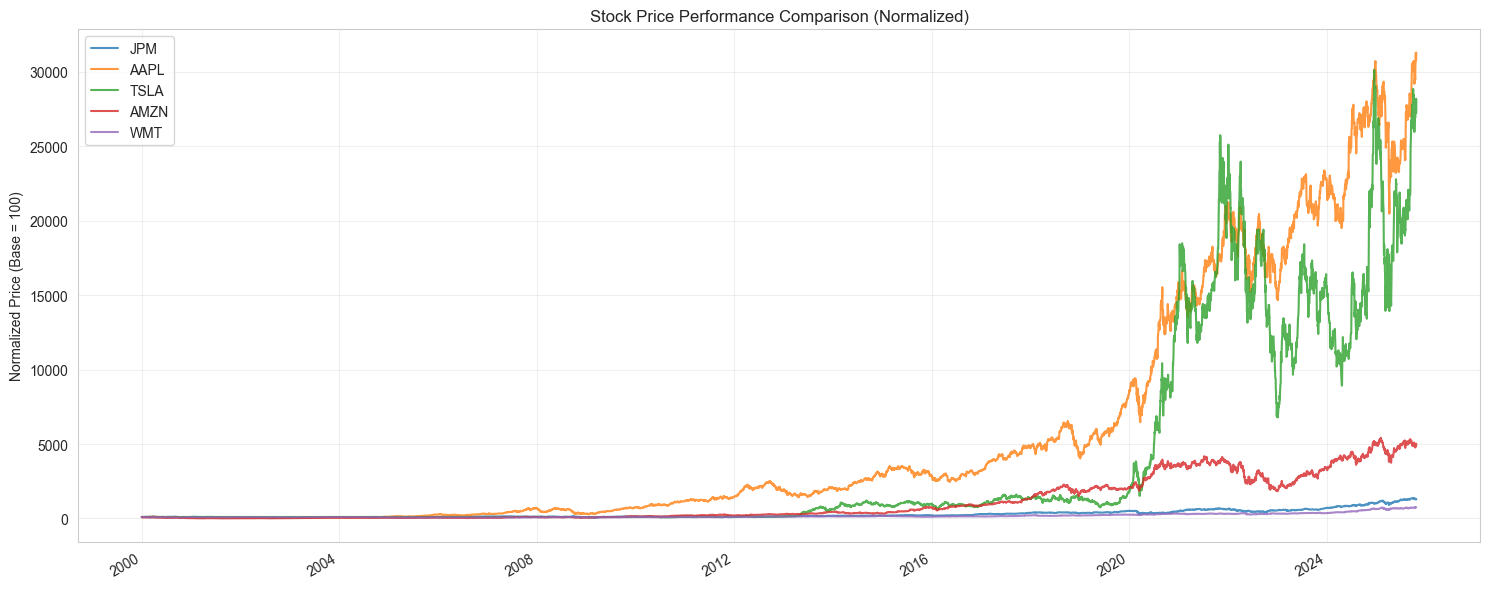

<Figure size 1400x600 with 0 Axes>

In [19]:
# Plot stock prices for selected companies
sample_companies = ['JPM', 'AAPL', 'TSLA', 'AMZN', 'WMT']

fig, ax = plt.subplots(figsize=(15, 6))

for company in sample_companies:
    price_col = f"{company}_Stock_Price"
    if price_col in df.columns:
        # Normalize to 100 at start for comparison
        normalized = (df[price_col] / df[price_col].iloc[0]) * 100
        normalized.plot(ax=ax, label=company, alpha=0.8)

ax.set_ylabel('Normalized Price (Base = 100)')
ax.set_title('Stock Price Performance Comparison (Normalized)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig('/Users/priyanka/Desktop/MLOPs/Mlops_Project_FinancialCrises/reports/stock_price_comparison.png', dpi=300)

## 9. Summary Report

In [20]:
print("="*70)
print("📋 DATASET SUMMARY REPORT")
print("="*70)

print(f"\n📊 Dataset Overview:")
print(f"   Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"   Date Range: {df.index.min()} to {df.index.max()}")
print(f"   Days Covered: {(df.index.max() - df.index.min()).days:,}")
print(f"   Missing Values: {df.isna().sum().sum()}")
print(f"   Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

print(f"\n📈 Feature Breakdown:")
for feat_type, count in feature_list['Type'].value_counts().items():
    print(f"   {feat_type}: {count} features")

print(f"\n💰 Company Analysis:")
print(f"   Total Companies: {len(companies)}")
print(f"   Best Performer: {returns_df.iloc[0]['Company']} ({returns_df.iloc[0]['Avg_Return']:.3f}% avg return)")
print(f"   Most Volatile: {returns_df.sort_values('Volatility', ascending=False).iloc[0]['Company']}")

if 'VIX' in df.columns and 'High_Volatility' in df.columns:
    print(f"\n🚨 Stress Periods:")
    print(f"   High Volatility Days: {df['High_Volatility'].sum():,} ({df['High_Volatility'].sum()/len(df)*100:.1f}%)")
    print(f"   Normal Days: {(~df['High_Volatility']).sum():,} ({(~df['High_Volatility']).sum()/len(df)*100:.1f}%)")

print("\n" + "="*70)
print("✅ EXPLORATION COMPLETE!")
print("="*70)

📋 DATASET SUMMARY REPORT

📊 Dataset Overview:
   Shape: 6,910 rows × 97 columns
   Date Range: 2000-01-01 00:00:00 to 2025-10-24 00:00:00
   Days Covered: 9,428
   Missing Values: 0
   Memory Usage: 5.1 MB

📈 Feature Breakdown:
   Company: 75 features
   FRED: 13 features
   Time: 5 features
   Market: 3 features

💰 Company Analysis:
   Total Companies: 25
   Best Performer: GOOGL (1.514% avg return)
   Most Volatile: NVDA

🚨 Stress Periods:
   High Volatility Days: 662 (9.6%)
   Normal Days: 6,248 (90.4%)

✅ EXPLORATION COMPLETE!


## 10. Save Summary Statistics

In [22]:
# Save company performance summary
returns_df.to_csv('/Users/priyanka/Desktop/MLOPs/Mlops_Project_FinancialCrises/reports/company_performance_summary.csv', index=False)
print("💾 Saved: reports/company_performance_summary.csv")

# Save correlation with VIX
if 'VIX' in df.columns:
    vix_corr_df = df.corr()['VIX'].sort_values(ascending=False).reset_index()
    vix_corr_df.columns = ['Feature', 'Correlation_with_VIX']
    vix_corr_df.to_csv('/Users/priyanka/Desktop/MLOPs/Mlops_Project_FinancialCrises/reports/vix_correlations.csv', index=False)
    print("💾 Saved: reports/vix_correlations.csv")

print("\n✅ All exploration complete!")

💾 Saved: reports/company_performance_summary.csv
💾 Saved: reports/vix_correlations.csv

✅ All exploration complete!
